In [407]:
import numpy as np
from scipy.integrate import odeint
import ORdmm_Land as model
import ORdmm_Land_em_coupling as model_coup
import matplotlib.pyplot as plt

import importlib
importlib.reload(model)
importlib.reload(model_coup)



<module 'ORdmm_Land_em_coupling' from '/Users/agathebyraaum/Documents/Simula/git/master_project/Python/ORdmm_Land_em_coupling.py'>

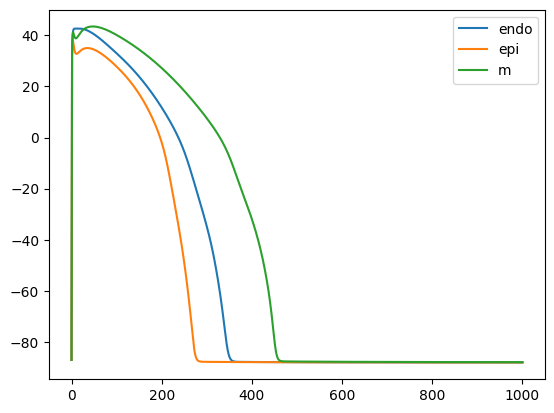

In [408]:
# Initial states
y0 = model.init_state_values()
# Parameters, celltype=0 => endo
parameters = model.init_parameter_values(celltype=0)
# Time steps
T = np.arange(0.0, 1000, 0.1)
Y = odeint(model.rhs, y0, T, args=(parameters,))
plt.plot(T, Y[:, model.state_indices("v")])


# Initial states
y0 = model.init_state_values()
# Parameters, celltype=1 => epi
parameters = model.init_parameter_values(celltype=1)
# Time steps
T = np.arange(0.0, 1000, 0.1)
Y = odeint(model.rhs, y0, T, args=(parameters,))
plt.plot(T, Y[:, model.state_indices("v")])


# Initial states
y0 = model.init_state_values()
# Parameters, celltype=2 => m
parameters = model.init_parameter_values(celltype=2)
# Time steps
T = np.arange(0.0, 1000, 0.1)
Y = odeint(model.rhs, y0, T, args=(parameters,))
plt.plot(T, Y[:, model.state_indices("v")])


plt.legend((r"endo", r"epi", r"m"))
plt.show()


## testing scaling for HF

### normal values (control)

In [409]:
# same import as above plus
import tqdm

In [21]:

# Initial states
y0 = model.init_state_values()

# Parameters, celltype = epi
parameters = model.init_parameter_values(celltype=0)
num_beats = 100  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y = odeint(model.rhs, y0, tsteps, args=(parameters,))
    y0 = y[-1]



100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


In [22]:

# Extract the membrane potential
V_idx = model.state_indices('v')
V = y.T[V_idx]
Cai_idx = model.state_indices('cai')
Cai = y.T[Cai_idx]

# Extract monitored values
#monitor = np.array([model.monitor(r, t, parameters) for
#                    r, t in zip(y, tsteps)])
#i_Kr_idx = model.monitor_indices('i_Kr')
#i_Kr = monitor.T[i_Kr_idx]


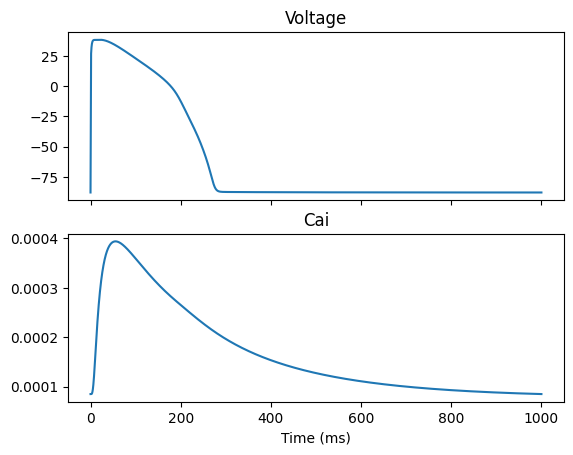

In [23]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps, V)
ax[0].set_title('Voltage')
ax[1].plot(tsteps, Cai)
ax[1].set_title('Cai')
ax[1].set_xlabel('Time (ms)')
plt.show()

### Simulating HF according to Gomez (2014)

In [411]:
# Initial states
y0 = model_coup.init_state_values()

# Parameters, celltype = epi
parameters = model_coup.init_parameter_values(
    celltype=0,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    #Jrel_infp_sensitivity=,
    )
num_beats = 100  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y = odeint(model_coup.rhs, y0, tsteps, args=(parameters,))
    y0 = y[-1]


100%|██████████| 100/100 [01:05<00:00,  1.54it/s]


In [412]:

# Extract the membrane potential
V_idx = model_coup.state_indices('v')
V = y.T[V_idx]
Cai_idx = model_coup.state_indices('cai')
Cai = y.T[Cai_idx]

# Extract monitored values
#monitor = np.array([model.monitor(r, t, parameters) for
#                    r, t in zip(y, tsteps)])
#i_Kr_idx = model.monitor_indices('i_Kr')
#i_Kr = monitor.T[i_Kr_idx]


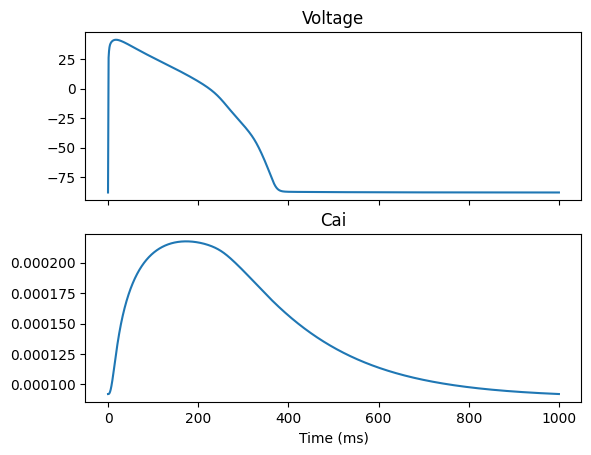

In [413]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps, V)
ax[0].set_title('Voltage')
ax[1].plot(tsteps, Cai)
ax[1].set_title('Cai')
ax[1].set_xlabel('Time (ms)')
plt.show()

#### Combo plot

100%|██████████| 60/60 [00:27<00:00,  2.16it/s]


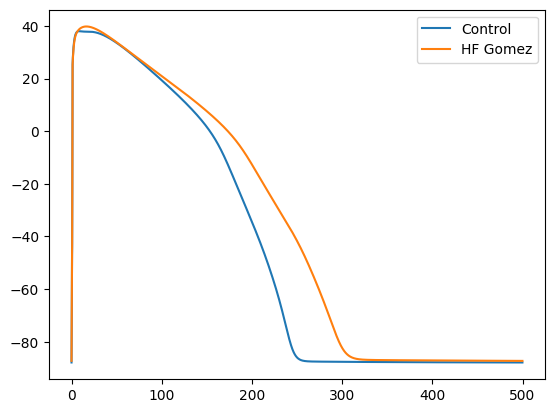

In [414]:
# Initial states
y0_c = model.init_state_values()
# Time steps
tsteps = np.arange(0.0, 500.0, 0.1)
num_beats = 60  # Note: matlab uses 700 beats

#CONTROL
# Parameters, celltype = epi
parameters_c = model.init_parameter_values(celltype=0)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_c = odeint(model.rhs, y0_c, tsteps, args=(parameters_c,))
    y0_c = y_c[-1]

# HF
y0_hf = model.init_state_values()
# Parameters, celltype = epi
parameters_hf = model.init_parameter_values(
    celltype=0,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    #Jrel_infp_sensitivity=,
    )

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_hf = odeint(model.rhs, y0_hf, tsteps, args=(parameters_hf,))
    y0_hf = y_hf[-1]

# Extract the membrane potential control
plt.plot(tsteps, y_c[:, model.state_indices("v")])
# Extract the membrane potential HF
plt.plot(tsteps, y_hf[:, model.state_indices("v")])

plt.legend((r"Control", r"HF Gomez"))
plt.show()

[Text(0, 0.5, 'ICaL')]

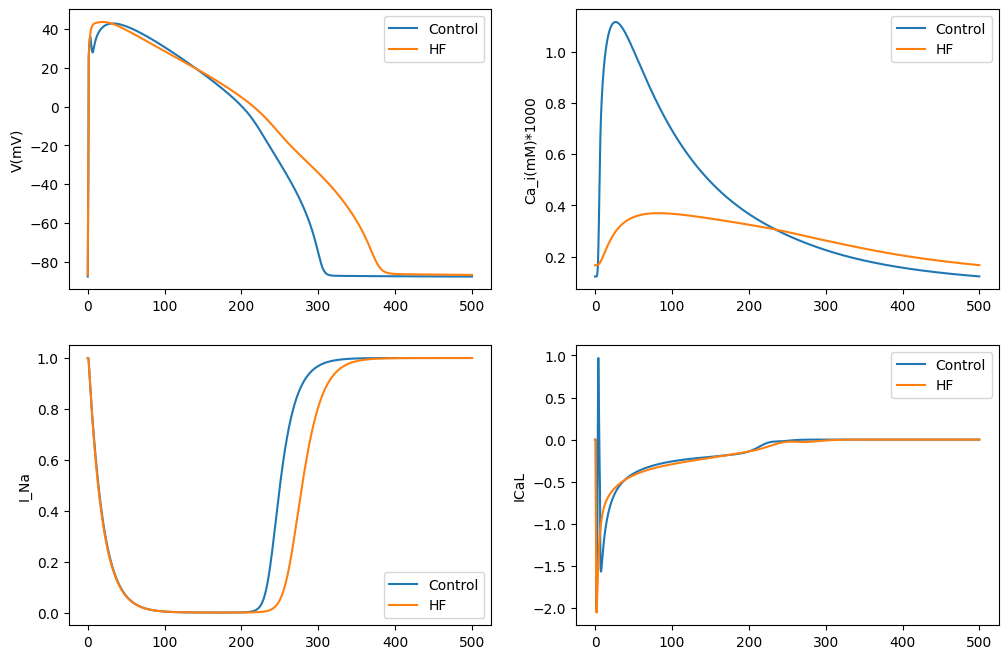

In [46]:
# Extract monitored values
monitor_c = np.array([model.monitor(r, t, parameters) for r, t in zip(y_c, tsteps)])
monitor_hf = np.array([model.monitor(r, t, parameters) for r, t in zip(y_hf, tsteps)])

I_CaL_idx_c = model.monitor_indices('ICaL')
I_CaL_c = monitor_c.T[I_CaL_idx_c]

I_CaL_idx_hf = model.monitor_indices('ICaL')
I_CaL_hf = monitor_hf.T[I_CaL_idx_hf]


fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs[0, 0].plot(tsteps, y_c[:, model.state_indices("v")])
axs[0, 1].plot(tsteps, y_c[:, model.state_indices("cai")]*1000)
axs[1, 0].plot(tsteps, y_c[:, model.monitor_indices('INa')])
#axs[1, 1].plot(tsteps, y_c[:, model.monitor_indices('ICaL')])
axs[1, 1].plot(tsteps, I_CaL_c)

axs[0, 0].plot(tsteps, y_hf[:, model.state_indices("v")])
axs[0, 0].legend((r"Control", r"HF"))
axs[0, 0].set(ylabel="V(mV)")
axs[0, 1].plot(tsteps, y_hf[:, model.state_indices("cai")]*1000)
axs[0, 1].legend((r"Control", r"HF"))
axs[0, 1].set(ylabel="Ca_i(mM)*1000")
axs[1, 0].plot(tsteps, y_hf[:, model.monitor_indices('INa')])
axs[1, 0].legend((r"Control", r"HF"))
axs[1, 0].set(ylabel="I_Na")
#axs[1, 1].plot(tsteps, y_hf[:, model.monitor_indices('ICaL')])
axs[1, 1].plot(tsteps, I_CaL_hf)
axs[1, 1].legend((r"Control", r"HF"))
axs[1, 1].set(ylabel="ICaL")


In [415]:
# Initial states
y0_c_endo = model.init_state_values()
y0_c_epi = model.init_state_values()
y0_c_m = model.init_state_values()
# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)
num_beats = 70  # Note: matlab uses 700 beats

#CONTROL
# Parameters, celltype = epi
parameters_c_endo = model.init_parameter_values(celltype=0)
parameters_c_epi = model.init_parameter_values(celltype=1)
parameters_c_m = model.init_parameter_values(celltype=2)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_c_endo = odeint(model.rhs, y0_c_endo, tsteps, args=(parameters_c_endo,))
    y0_c_endo = y_c_endo[-1]

    y_c_epi = odeint(model.rhs, y0_c_epi, tsteps, args=(parameters_c_epi,))
    y0_c_epi = y_c_epi[-1]

    y_c_m = odeint(model.rhs, y0_c_m, tsteps, args=(parameters_c_m,))
    y0_c_m = y_c_m[-1]

# HF endo
y0_hf_endo = model.init_state_values()
# Parameters, celltype = epi
parameters_hf_endo = model.init_parameter_values(
    celltype=0,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    #Jrel_infp_sensitivity=,
    )

# HF endo
y0_hf_epi = model.init_state_values()
# Parameters, celltype = epi
parameters_hf_epi = model.init_parameter_values(
    celltype=1,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    #Jrel_infp_sensitivity=,
    )

# HF endo
y0_hf_m = model.init_state_values()
# Parameters, celltype = epi
parameters_hf_m = model.init_parameter_values(
    celltype=2,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    #Jrel_infp_sensitivity=,
    )

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_hf_endo = odeint(model.rhs, y0_hf_endo, tsteps, args=(parameters_hf_endo,))
    y0_hf_endo = y_hf_endo[-1]

    y_hf_epi = odeint(model.rhs, y0_hf_epi, tsteps, args=(parameters_hf_epi,))
    y0_hf_epi = y_hf_epi[-1]

    y_hf_m = odeint(model.rhs, y0_hf_m, tsteps, args=(parameters_hf_m,))
    y0_hf_m = y_hf_m[-1]

100%|██████████| 70/70 [01:58<00:00,  1.69s/it]


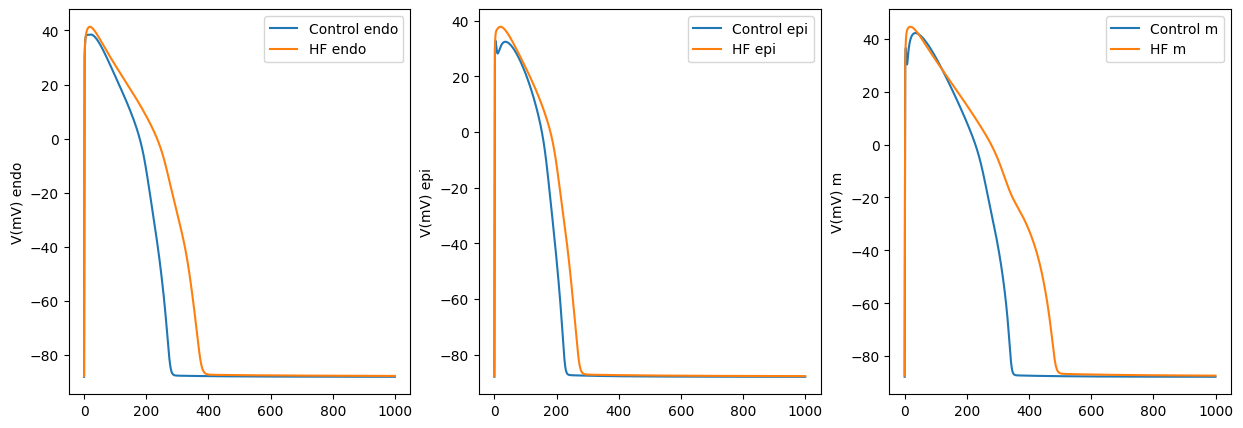

In [416]:
#y_c_epi[:, model.state_indices("cai")]*1000
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(tsteps, y_c_endo[:, model.state_indices("v")])
axs[1].plot(tsteps, y_c_epi[:, model.state_indices("v")])
axs[2].plot(tsteps, y_c_m[:, model.state_indices("v")])


axs[0].plot(tsteps, y_hf_endo[:, model.state_indices("v")])
axs[1].plot(tsteps, y_hf_epi[:, model.state_indices("v")])
axs[2].plot(tsteps, y_hf_m[:, model.state_indices("v")])


#Ca_i(mM)*1000
axs[0].set(ylabel="V(mV) endo")
axs[1].set(ylabel="V(mV) epi")
axs[2].set(ylabel="V(mV) m")

axs[0].legend((r"Control endo", r"HF endo"))
axs[1].legend((r"Control epi", r"HF epi"))
axs[2].legend((r"Control m", r"HF m"))

In [417]:
# HF heterogeneous endo
y0_hf_het_endo = model.init_state_values()
# Parameters, celltype = epi
parameters_hf_het_endo = model.init_parameter_values(
    celltype=0,
    Gncx_rate=1.60,
    #Jleak_rate=1.30,
    Jserca_rate=0.45,
    )

# HF heterogeneous epi
y0_hf_het_epi = model.init_state_values()
# Parameters, celltype = epi
parameters_hf_het_epi = model.init_parameter_values(
    celltype=1,
    Gncx_rate=2.0,
    #Jleak_rate=1.30,
    Jserca_rate=0.750,
    )

# HF heterogeneous m
y0_hf_het_m = model.init_state_values()
# Parameters, celltype = epi
parameters_hf_het_m = model.init_parameter_values(
    celltype=2,
    Gncx_rate=1.60,
    #Jleak_rate=1.30,
    Jserca_rate=0.60,
    )

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_hf_het_endo = odeint(model.rhs, y0_hf_het_endo, tsteps, args=(parameters_hf_het_endo,))
    y0_hf_het_endo = y_hf_het_endo[-1]

    y_hf_het_epi = odeint(model.rhs, y0_hf_het_epi, tsteps, args=(parameters_hf_het_epi,))
    y0_hf_het_epi = y_hf_het_epi[-1]

    y_hf_het_m = odeint(model.rhs, y0_hf_het_m, tsteps, args=(parameters_hf_het_m,))
    y0_hf_het_m = y_hf_het_m[-1]

 13%|█▎        | 9/70 [00:15<01:48,  1.77s/it]


KeyboardInterrupt: 

(0.5, 10.0)

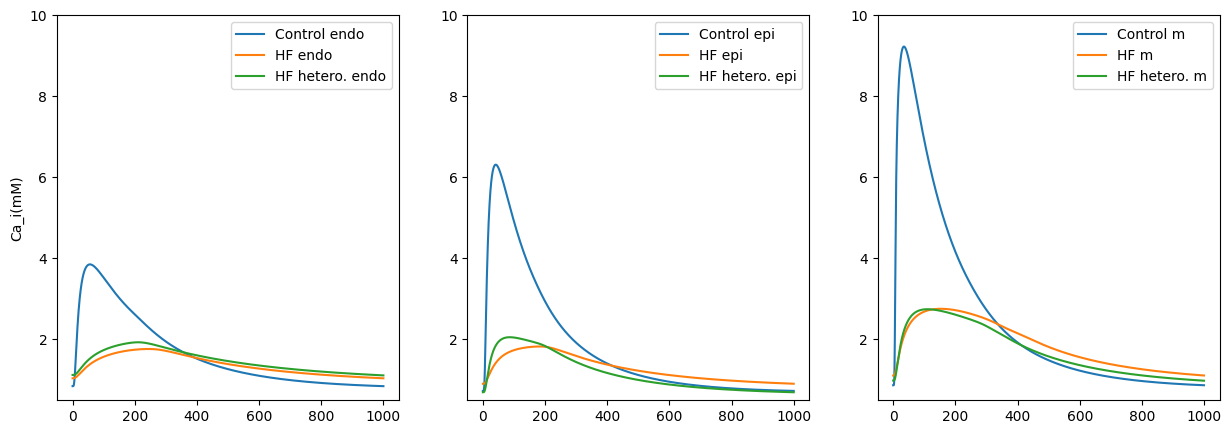

In [418]:
#y_c_epi[:, model.state_indices("cai")]*1000
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(tsteps, y_c_endo[:, model.state_indices("cai")]*10000)
axs[1].plot(tsteps, y_c_epi[:, model.state_indices("cai")]*10000)
axs[2].plot(tsteps, y_c_m[:, model.state_indices("cai")]*10000)


axs[0].plot(tsteps, y_hf_endo[:, model.state_indices("cai")]*10000)
axs[1].plot(tsteps, y_hf_epi[:, model.state_indices("cai")]*10000)
axs[2].plot(tsteps, y_hf_m[:, model.state_indices("cai")]*10000)

axs[0].plot(tsteps, y_hf_het_endo[:, model.state_indices("cai")]*10000)
axs[1].plot(tsteps, y_hf_het_epi[:, model.state_indices("cai")]*10000)
axs[2].plot(tsteps, y_hf_het_m[:, model.state_indices("cai")]*10000)


#Ca_i(mM)*1000
axs[0].set(ylabel="Ca_i(mM)")
#axs[1].set(ylabel="Ca_i(mM) epi")
#axs[2].set(ylabel="Ca_i(mM) m")

axs[0].legend((r"Control endo", r"HF endo", r"HF hetero. endo"))
axs[1].legend((r"Control epi", r"HF epi", r"HF hetero. epi"))
axs[2].legend((r"Control m", r"HF m", r"HF hetero. m"))

axs[0].set_ylim(bottom=0.5, top=10)
axs[1].set_ylim(bottom=0.5, top=10)
axs[2].set_ylim(bottom=0.5, top=10)


(-20.0, 600.0)

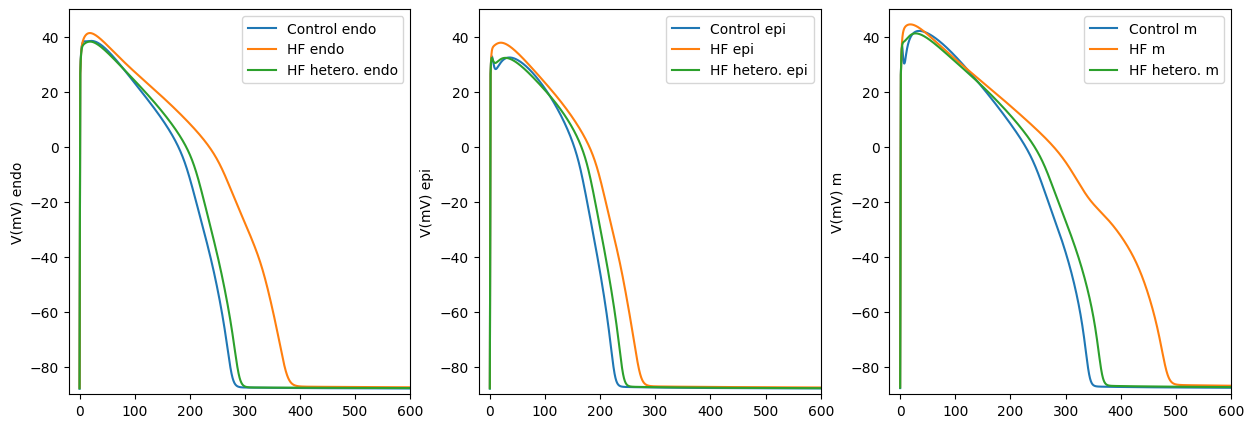

In [78]:
#y_c_epi[:, model.state_indices("cai")]*1000
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].plot(tsteps, y_c_endo[:, model.state_indices("v")])
axs[1].plot(tsteps, y_c_epi[:, model.state_indices("v")])
axs[2].plot(tsteps, y_c_m[:, model.state_indices("v")])


axs[0].plot(tsteps, y_hf_endo[:, model.state_indices("v")])
axs[1].plot(tsteps, y_hf_epi[:, model.state_indices("v")])
axs[2].plot(tsteps, y_hf_m[:, model.state_indices("v")])

axs[0].plot(tsteps, y_hf_het_endo[:, model.state_indices("v")])
axs[1].plot(tsteps, y_hf_het_epi[:, model.state_indices("v")])
axs[2].plot(tsteps, y_hf_het_m[:, model.state_indices("v")])



#Ca_i(mM)*1000
axs[0].set(ylabel="V(mV) endo")
axs[1].set(ylabel="V(mV) epi")
axs[2].set(ylabel="V(mV) m")

axs[0].legend((r"Control endo", r"HF endo", r"HF hetero. endo"))
axs[1].legend((r"Control epi", r"HF epi", r"HF hetero. epi"))
axs[2].legend((r"Control m", r"HF m", r"HF hetero. m"))

axs[0].set_ylim(bottom=-90, top=50)
axs[1].set_ylim(bottom=-90, top=50)
axs[2].set_ylim(bottom=-90, top=50)

axs[0].set_xlim(-20, 600)
axs[1].set_xlim(-20, 600)
axs[2].set_xlim(-20, 600)

## Testing extraction of APD(90) and CaTmax (just electro)

### Description:

The script should simply load the result from the model and measure what is needed, giving APD, CaTmax etc as outputs/plots.

In [7]:
# loading the healthy controll model for endo cell

# Initial states
y0_c = model.init_state_values()

# Parameters, celltype = epi
parameters_c = model.init_parameter_values(celltype=0)
num_beats = 70  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_c = odeint(model.rhs, y0_c, tsteps, args=(parameters_c,))
    y0_c = y_c[-1]


100%|██████████| 70/70 [00:38<00:00,  1.81it/s]


In [6]:
# loading the homogenous HF model for endo cell (Gomez)

# Initial states
y0_hf = model.init_state_values()

# Parameters, celltype = epi
parameters_hf = model.init_parameter_values(
    celltype=0,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    Jrel_infp_sensitivity=0.80,
    )
num_beats = 70  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_hf = odeint(model.rhs, y0_hf, tsteps, args=(parameters_hf,))
    y0_hf = y_hf[-1]

100%|██████████| 70/70 [00:38<00:00,  1.81it/s]


In [13]:
# the last values are then y_c, y_hf

print(y_c.shape)
print(y_hf.shape)

# Extract monitored values
monitor_c = np.array([model.monitor(r, t, parameters) for r, t in zip(y_c, tsteps)])
monitor_hf = np.array([model.monitor(r, t, parameters) for r, t in zip(y_hf, tsteps)])

print(monitor_c.shape)
print(monitor_hf.shape)

# Example how to extract
#I_CaL_idx_c = model.monitor_indices('ICaL')
#I_CaL_c = monitor_c.T[I_CaL_idx_c]

#I_CaL_idx_hf = model.monitor_indices('ICaL')
#I_CaL_hf = monitor_hf.T[I_CaL_idx_hf]


(10000, 48)
(10000, 48)
(10000, 285)
(10000, 285)


In [17]:
# Extracting desired array

# AP
# APD at 90% of repolarization (APD90) 

# Ca transient (Cai) duration was measured as the time from the upstroke to 80% recovery (CaTD80)

# The voltage-calcium delay (AP-Ca delay) was measured as the delay between the upstrokes of AP and Ca transient

# Extract the membrane potential
V_idx = model.state_indices('v')
V_c = y_c.T[V_idx]
V_hf = y_hf.T[V_idx]
# Extract Cai
Cai_idx = model.state_indices('cai')
Cai_c = y_c.T[Cai_idx]
Cai_hf = y_hf.T[Cai_idx]

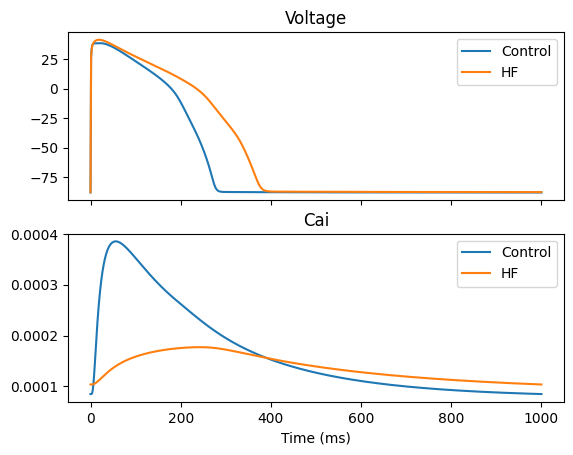

In [93]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps, V_c)
ax[0].plot(tsteps, V_hf)
ax[0].set_title('Voltage')
ax[0].legend(['Control', 'HF'])
ax[1].plot(tsteps, Cai_c)
ax[1].plot(tsteps, Cai_hf)
ax[1].set_title('Cai')
ax[1].set_xlabel('Time (ms)')
ax[1].legend(['Control', 'HF'])
plt.show()

In [147]:
# control
cai_c_max_idx = np.argmax(Cai_c)
cai_hf_max_idx = np.argmax(Cai_hf)

V_c_max_idx = np.argmax(V_c)
V_hf_max_idx = np.argmax(V_hf)

min_V_c = min(V_c)
max_V_c = max(V_c)
min_V_hf = min(V_hf)
max_V_hf = max(V_hf)

V_c_tmp = V_c[V_c_max_idx:]
V_hf_tmp = V_hf[V_hf_max_idx:]

# find value of range [min V, max V] at 90 % repolarization
V_c_90 = 0.50*(max_V_c-min_V_c)+min_V_c
V_hf_90 = 0.50*(max_V_hf-min_V_hf)+min_V_hf

# find the index
APD90_idx_tmp_c = (np.abs(V_c_tmp - V_c_90)).argmin() 
APD90_idx_c = V_c_max_idx + APD90_idx_tmp_c

APD90_idx_tmp_hf = (np.abs(V_hf_tmp - V_hf_90)).argmin() 
APD90_idx_hf = V_hf_max_idx + APD90_idx_tmp_hf


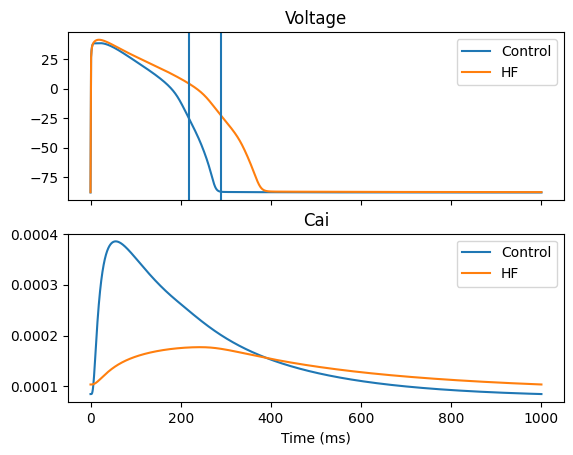

In [148]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps, V_c)
ax[0].plot(tsteps, V_hf)
ax[0].axvline(tsteps[APD90_idx_c])
ax[0].axvline(tsteps[APD90_idx_hf])
ax[0].set_title('Voltage')
ax[0].legend(['Control', 'HF'])
ax[1].plot(tsteps, Cai_c)
ax[1].plot(tsteps, Cai_hf)
ax[1].set_title('Cai')
ax[1].set_xlabel('Time (ms)')
ax[1].legend(['Control', 'HF'])
plt.show()

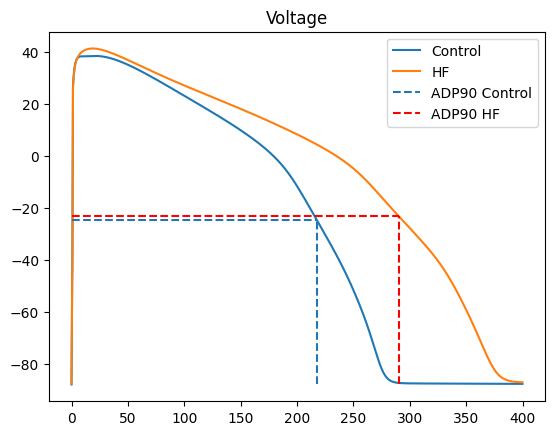

In [149]:
plt.plot(tsteps[:4000], V_c[:4000])
plt.plot(tsteps[:4000], V_hf[:4000])
plt.vlines(tsteps[APD90_idx_c], min_V_c, V_c_90, linestyle='dashed')
plt.vlines(tsteps[APD90_idx_hf], min_V_hf, V_hf_90, linestyle='dashed', color='r')
plt.hlines(V_c_90, 0, tsteps[APD90_idx_c], linestyle='dashed')
plt.hlines(V_hf_90, 0, tsteps[APD90_idx_hf], linestyle='dashed', color='r')
plt.title('Voltage')
plt.legend(['Control', 'HF', 'ADP90 Control', 'ADP90 HF'])
plt.show()

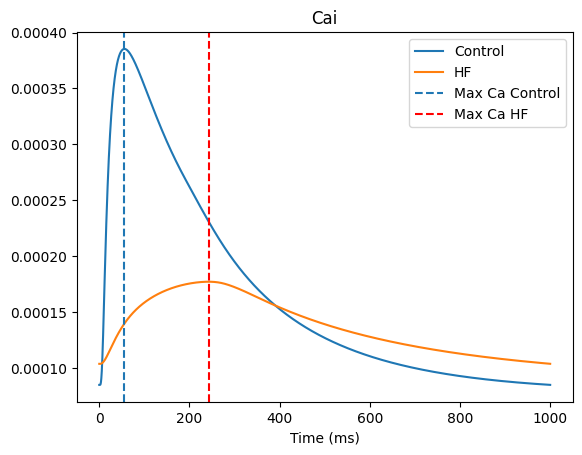

In [133]:
# max CaT

plt.plot(tsteps, Cai_c)
plt.plot(tsteps, Cai_hf)
plt.axvline(tsteps[cai_c_max_idx], linestyle='dashed')
plt.axvline(tsteps[cai_hf_max_idx], linestyle='dashed', color='r')
plt.title('Cai')
plt.xlabel('Time (ms)')
plt.legend(['Control', 'HF', 'Max Ca Control', 'Max Ca HF'])
plt.show()



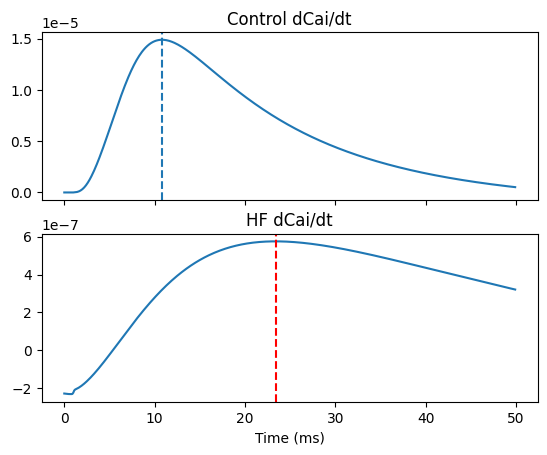

In [138]:
# CaTD80
#time from upstroke to recovery

# Extract d_Cai_dt
d_cai_idx = model.monitor_indices('dcai_dt')
d_cai_c = monitor_c.T[d_cai_idx]
d_cai_hf = monitor_hf.T[d_cai_idx]

dcai_c_max_idx = np.argmax(d_cai_c)
dcai_hf_max_idx = np.argmax(d_cai_hf)

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps[:500], d_cai_c[:500])
ax[0].axvline(tsteps[dcai_c_max_idx], linestyle='dashed')
ax[0].set_title('Control dCai/dt')
ax[1].plot(tsteps[:500], d_cai_hf[:500])
ax[1].axvline(tsteps[dcai_hf_max_idx], linestyle='dashed', color='r')
ax[1].set_title('HF dCai/dt')
ax[1].set_xlabel('Time (ms)')
plt.show()

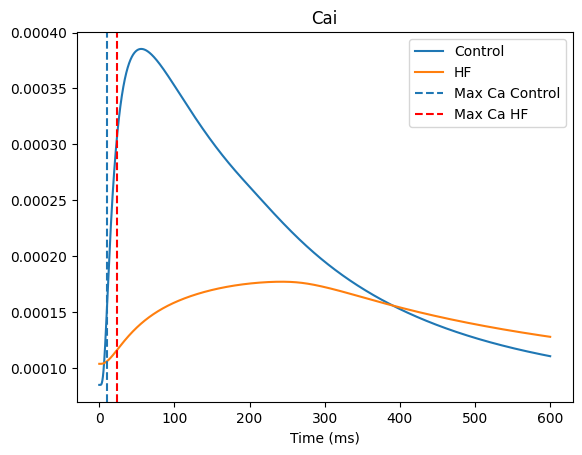

In [140]:
# max CaT

plt.plot(tsteps[:6000], Cai_c[:6000])
plt.plot(tsteps[:6000], Cai_hf[:6000])
plt.axvline(tsteps[dcai_c_max_idx], linestyle='dashed')
plt.axvline(tsteps[dcai_hf_max_idx], linestyle='dashed', color='r')
plt.title('Cai')
plt.xlabel('Time (ms)')
plt.legend(['Control', 'HF', 'Max Ca Control', 'Max Ca HF'])
plt.show()

### Testing HF with mechanics
(ionic acc. Gomez, mech acc. Zile sensitivity analysis)

In [402]:
# Initial states
y0_c = model_coup.init_state_values()

# Parameters, celltype = epi
parameters_c = model_coup.init_parameter_values(
    celltype=0,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    Jrel_infp_sensitivity=0.80,
    # mechanical
    kuw_rate=1,
    ku_rate=1,
    kws_rate=1,
    )
num_beats = 10  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_c = odeint(model_coup.rhs, y0_c, tsteps, args=(parameters_c,))
    y0_c = y_c[-1]

100%|██████████| 10/10 [00:07<00:00,  1.35it/s]


In [403]:
# Initial states
y0_h = model_coup.init_state_values()

# Parameters, celltype = epi
parameters_h = model_coup.init_parameter_values(
    celltype=0,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    Jrel_infp_sensitivity=0.80,
    # mechanical
    kuw_rate=10,
    ku_rate=10,
    kws_rate=10,
    )
num_beats = 10  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_h = odeint(model_coup.rhs, y0_h, tsteps, args=(parameters_h,))
    y0_h = y_h[-1]

100%|██████████| 10/10 [00:07<00:00,  1.33it/s]


In [404]:
# Initial states
y0_l = model_coup.init_state_values()

# Parameters, celltype = epi
parameters_l = model_coup.init_parameter_values(
    celltype=0,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    Jrel_infp_sensitivity=0.80,
    # mechanical
    kuw_rate=0.1,
    ku_rate=0.1,
    kws_rate=0.1,
    )
num_beats = 10  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_l = odeint(model_coup.rhs, y0_l, tsteps, args=(parameters_l,))
    y0_l = y_l[-1]

100%|██████████| 10/10 [00:06<00:00,  1.45it/s]


In [405]:
# Extract the membrane potential
V_idx_c = model_coup.state_indices('v')
V_c = y_c.T[V_idx_c]
Cai_idx_c = model_coup.state_indices('cai')
Cai_c = y_c.T[Cai_idx_c]

V_idx_h = model_coup.state_indices('v')
V_h = y_h.T[V_idx_h]
Cai_idx_h = model_coup.state_indices('cai')
Cai_h = y_h.T[Cai_idx_h]

V_idx_l = model_coup.state_indices('v')
V_l = y_l.T[V_idx_l]
Cai_idx_l = model_coup.state_indices('cai')
Cai_l = y_l.T[Cai_idx_l]


#monitor = np.array([model_coup.monitor(r, t, parameters) for r, t in zip(y, tsteps)])
#Ta_idx = model_coup.monitor_indices('Ta')
#Ta = monitor.T[Ta_idx]


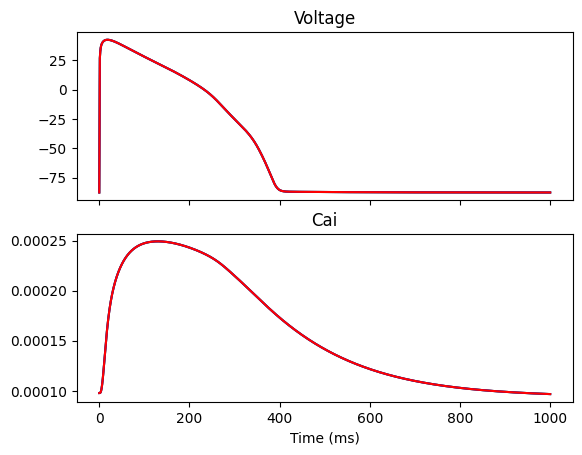

In [406]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps, V_c, 'g')
ax[0].plot(tsteps, V_h, 'b')
ax[0].plot(tsteps, V_l, 'r')
ax[0].set_title('Voltage')
ax[1].plot(tsteps, Cai_c, 'g')
ax[1].plot(tsteps, Cai_h, 'b')
ax[1].plot(tsteps, Cai_l, 'r')
ax[1].set_title('Cai')
ax[1].set_xlabel('Time (ms)')
plt.show()

100%|██████████| 100/100 [01:07<00:00,  1.48it/s]


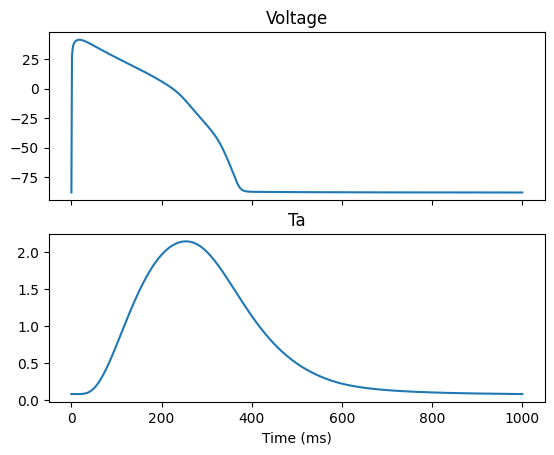

In [197]:
# Initial states
y0_c = model_coup.init_state_values()

# Parameters, celltype = epi
parameters_c = model_coup.init_parameter_values(
    celltype=0,
    GNaL_rate=1.80,
    Gto_rate=0.40,
    GK1_rate=0.68,
    Gncx_rate=1.750,
    Jleak_rate=1.30,
    Jserca_rate=0.5,
    CaMKa_rate=1.50,
    Pnak_rate=0.70,
    Pnab_rate=1,
    Pcab_rate=1,
    thl_rate=1.80,
    Jrel_inf_sensitivity=0.80,
    Jrel_infp_sensitivity=0.80,
    # mechanical
    #Trpn50_rate=1.2,
    )
num_beats = 100  # Note: matlab uses 700 beats

# Time steps
tsteps = np.arange(0.0, 1000.0, 0.1)

# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y_c = odeint(model_coup.rhs, y0_c, tsteps, args=(parameters_c,))
    y0_c = y_c[-1]

# Extract the membrane potential
V_idx_c = model_coup.state_indices('v')
V_c = y.T[V_idx_c]
Cai_idx_c = model_coup.state_indices('cai')
Cai_c = y_c.T[Cai_idx_c]


monitor_c = np.array([model_coup.monitor(r, t, parameters) for r, t in zip(y_c, tsteps)])

Ta_idx_c = model_coup.monitor_indices('Ta')
Ta_c = monitor_c.T[Ta_idx_c]

# Extract monitored values
#monitor = np.array([model.monitor(r, t, parameters) for
#                    r, t in zip(y, tsteps)])
#i_Kr_idx = model.monitor_indices('i_Kr')
#i_Kr = monitor.T[i_Kr_idx]

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(tsteps, V_c)
ax[0].set_title('Voltage')
ax[1].plot(tsteps, Ta_c)
ax[1].set_title('Ta')
ax[1].set_xlabel('Time (ms)')
plt.show()

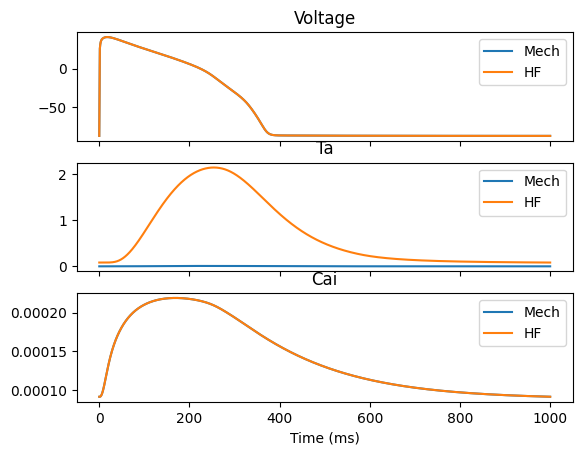

In [199]:
fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(tsteps, V)
ax[0].plot(tsteps, V_c)
ax[0].legend(['Mech', 'HF'])
ax[0].set_title('Voltage')
ax[1].plot(tsteps, Ta)
ax[1].plot(tsteps, Ta_c)
ax[1].legend(['Mech', 'HF'])
ax[1].set_title('Ta')
ax[2].plot(tsteps, Cai)
ax[2].plot(tsteps, Cai_c)
ax[2].legend(['Mech', 'HF'])
ax[2].set_title('Cai')
ax[2].set_xlabel('Time (ms)')

plt.show()


### Testing mechanics

Look at:

- Active tension
- Peak active tension
- Time to peak


100%|██████████| 10/10 [00:07<00:00,  1.42it/s]


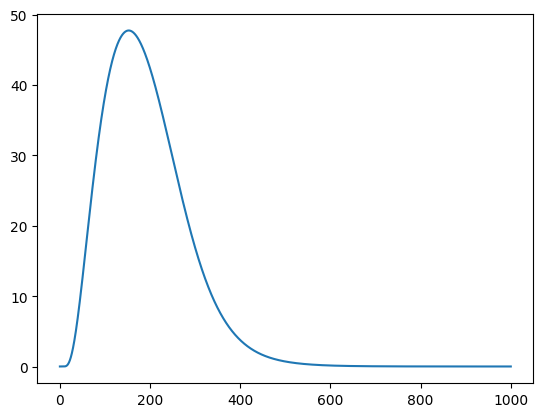

In [349]:
# Looking at active tension

# Initial states
y = np.load('init_values/control_epi_ordmm.npy') #model_coup.init_state_values()

tsteps = np.arange(0.0, 1000.0, 0.1)
num_beats = 10

parameters = model_coup.init_parameter_values(
    celltype=1,
    )


# Solve ODE
for i in tqdm.tqdm(range(num_beats)):
    y = odeint(model_coup.rhs, y0, tsteps, args=(parameters,))
    y0 = y[-1]

# Extract the membrane potential
V_idx = model_coup.state_indices('v')
V = y.T[V_idx]

monitor = np.array([model_coup.monitor(r, t, parameters) for r, t in zip(y, tsteps)])

Ta_idx = model_coup.monitor_indices('Ta')
Ta = monitor.T[Ta_idx]

plt.plot(tsteps, Ta)